# PreProcessing Assignment

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading DataSet

Loading dataset into python environment

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\titanic_dataset.csv")

Displaying first 5 rows of the dataset

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Setting Passenger Id as Index column

In [4]:
data.set_index('PassengerId',inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. BASIC DETAILS OF THE DATASET

In [6]:
#Statistical Summary of the dataset
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Checking basis information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
#Shape of the dataset
data.shape

(891, 11)

In [9]:
#Checking the null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age,Embarked and Cabin columns have NULL values

# 4. FINDING MISSING VALUES

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Finding the mean of Age column
data['Age'].mean()

29.69911764705882

In [12]:
#Finding the median of Age column
data['Age'].median()

28.0

In [13]:
#Filling null values with median of Age
data['Age'] = data['Age'].fillna(data['Age'].median())

In [14]:
data['Age'].isna().sum()

0

Null values in Age column is removed

In [15]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
# Embarked is categorical column..so filling it with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [17]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Filled the null values in Age and Embarked columns

In [18]:
## Cabin contains too many missing values..So dropping that column

In [19]:
data.drop('Cabin',axis=1,inplace=True)

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

All the null values removed successfully

# 5. Handling outliers

In [21]:
#Checking the column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## Boxplot

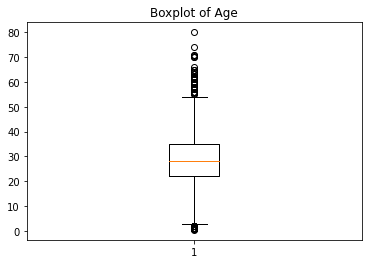

In [22]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')
plt.show()

Outliers present in Age column..SO we need to find the index and drop it

In [23]:
#Finding Q1,Q2 and Q3 
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [24]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [25]:
data['Age'].median()

28.0

In [26]:
#Calculating the interquartile range
IQR=Q3-Q1

In [27]:
print(IQR)

13.0


In [28]:
#Finding the lower limit and upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [29]:
print(low_lim)
print(up_lim)

2.5
54.5


In [30]:
#Finding the outliers
outlier =[]
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [31]:
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


## Finding the index

In [32]:
ind=data['Age']>up_lim
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

## Dropping that index

In [33]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [34]:
data.head(20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


Finding the outliers and Dropping that for Fare column

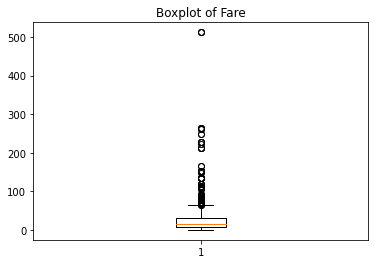

In [35]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [36]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [37]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [38]:
IQR=Q3-Q1

In [39]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [40]:
print(low_lim)
print(up_lim)

-26.0105
64.4063


In [41]:
outlier =[]
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [42]:
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [43]:
ind1=data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

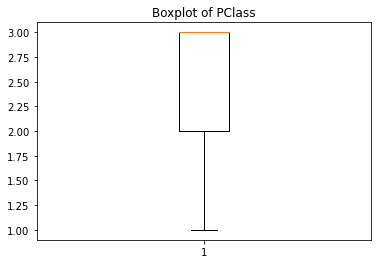

In [44]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of PClass')
plt.show()

In [45]:
#No Outliers

In [46]:
Q1 = np.percentile(data['Pclass'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Pclass'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Pclass'], 75, interpolation='midpoint')

In [47]:
print(Q1)
print(Q2)
print(Q3)

2.0
3.0
3.0


In [48]:
IQR=Q3-Q1

In [49]:
print(IQR)

1.0


In [50]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [51]:
print(low_lim)
print(up_lim)

0.5
4.5


In [52]:
outlier =[]
for x in data['Pclass']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [53]:
print(outlier)

[]


# 6. MIN MAX SCALING on the feature set ( ‘Survived’ is target)

In [54]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.387515,2.347468,27.746961,0.541814,0.386337,31.590365
std,0.487470,0.820217,10.998343,1.123697,0.809205,49.630167
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.108300
75%,1.000000,3.000000,33.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


In [56]:
X=data.drop('Survived',axis=1)
Y=data['Survived']


In [57]:
X1=X.drop(['Name','Sex','Ticket','Embarked'],axis=1)

In [58]:
X1

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


MinMax Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [62]:
X1=min_max_scaler.fit_transform(X1)

In [63]:
type(X1)

numpy.ndarray

In [64]:
X1=pd.DataFrame(X1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [65]:
X=X.drop(['Pclass','Age','SibSp','Parch','Fare'],axis=1,inplace=True)

In [66]:
X=pd.concat([X,X1],axis=1)

In [67]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.402762,0.125,0.0,0.014151
1,0.0,0.701381,0.125,0.0,0.139136
2,1.0,0.477417,0.000,0.0,0.015469
3,0.0,0.645390,0.125,0.0,0.103644
4,1.0,0.645390,0.000,0.0,0.015713


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

Linear Regression Model

In [69]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions=model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error is : ", mean_squared_error(y_test,predictions))
print(" R squared value is   : ",r2_score(y_test,predictions))

Mean Squared Error is :  0.21241752099578926
 R squared value is   :  0.14069619865925143
